In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

In [2]:
pd.read_csv('dados_quarto_dia/movies.csv')

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
dados = pd.read_csv('dados_quarto_dia/movies.csv')[['movieId', 'genres']]
dados = dados.set_index('movieId')
dados = dados['genres'].str.get_dummies()

In [4]:
dados = dados.drop(columns='(no genres listed)')

In [5]:
pd.read_csv('dados_quarto_dia/ratings.csv')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
dados

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
wcss = []
for i in range(1,81,10):
    kmeans_dados_e = KMeans(n_clusters=i, random_state=1)
    kmeans_dados_e.fit(dados)
    wcss.append(kmeans_dados_e.inertia_)

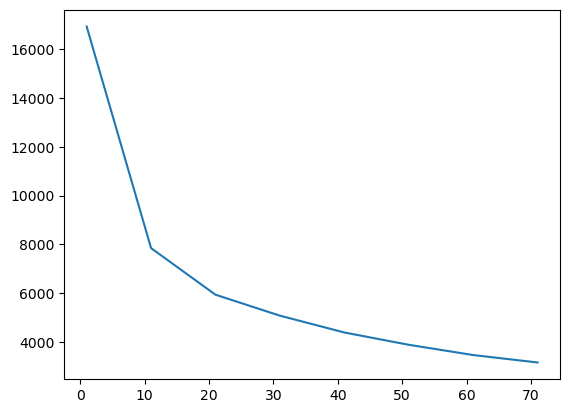

In [8]:
plt.plot(range(1,81,10), wcss)

In [9]:
pca = PCA(n_components=2)

In [10]:
embedding_pca = pca.fit_transform(dados)
projection = pd.DataFrame(columns=['x', 'y'], data=embedding_pca)

In [11]:
projection

,x,y
0,1.072396,0.318013
1,0.294628,0.529783
2,0.825940,-0.434468
3,0.221057,-1.004412
4,0.756239,-0.118839
...,...,...
9737,0.825264,0.479360
9738,0.896402,0.029616
9739,-0.544031,-0.408501
9740,0.072094,0.679700


In [12]:
kmeans_pca = KMeans(n_clusters=20)

kmeans_pca.fit(projection)

projection['cluster_pca'] = kmeans_pca.predict(projection)

In [13]:
projection

,x,y,cluster_pca
0,1.072396,0.318013,15
1,0.294628,0.529783,18
2,0.825940,-0.434468,0
3,0.221057,-1.004412,19
4,0.756239,-0.118839,6
...,...,...,...
9737,0.825264,0.479360,17
9738,0.896402,0.029616,15
9739,-0.544031,-0.408501,5
9740,0.072094,0.679700,14


In [14]:
projection = projection.join(pd.read_csv('dados_quarto_dia/movies.csv'))
projection = projection.set_index('movieId')

In [15]:
projection

,x,y,cluster_pca,title,genres
movieId,,,,,
1,1.072396,0.318013,15,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,0.294628,0.529783,18,Jumanji (1995),Adventure|Children|Fantasy
3,0.825940,-0.434468,0,Grumpier Old Men (1995),Comedy|Romance
4,0.221057,-1.004412,19,Waiting to Exhale (1995),Comedy|Drama|Romance
5,0.756239,-0.118839,6,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
193581,0.825264,0.479360,17,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,0.896402,0.029616,15,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,-0.544031,-0.408501,5,Flint (2017),Drama


In [16]:
def recomendador(nome_filme):    
    cluster = list(projection[projection['title'] == nome_filme]['cluster_pca'])[0]
    filmes_recomendados = projection[projection['cluster_pca'] == cluster][['x','y','title','genres']]
    x = list(projection[projection['title'] == nome_filme]['x'])[0]
    y = list(projection[projection['title'] == nome_filme]['y'])[0]
    distancias = euclidean_distances(filmes_recomendados[['x','y']], [[x,y]])
    filmes_recomendados['distancias'] = distancias
    return filmes_recomendados.sort_values('distancias').head(10)

In [17]:
recomendador('Grumpier Old Men (1995)')

,x,y,title,genres,distancias
movieId,,,,,
3,0.82594,-0.434468,Grumpier Old Men (1995),Comedy|Romance,0.0
25905,0.82594,-0.434468,"Miracle of Morgan's Creek, The (1944)",Comedy|Romance,0.0
25827,0.82594,-0.434468,Mr. Deeds Goes to Town (1936),Comedy|Romance,0.0
25826,0.82594,-0.434468,Libeled Lady (1936),Comedy|Romance,0.0
25769,0.82594,-0.434468,"Steamboat Bill, Jr. (1928)",Comedy|Romance,0.0
8916,0.82594,-0.434468,Shall We Dance? (2004),Comedy|Romance,0.0
8869,0.82594,-0.434468,First Daughter (2004),Comedy|Romance,0.0
8866,0.82594,-0.434468,Wimbledon (2004),Comedy|Romance,0.0
8809,0.82594,-0.434468,Danny Deckchair (2003),Comedy|Romance,0.0


In [18]:
recomendador('Father of the Bride Part II (1995)')

,x,y,title,genres,distancias
movieId,,,,,
5,0.756239,-0.118839,Father of the Bride Part II (1995),Comedy,0.0
42732,0.756239,-0.118839,Last Holiday (2006),Comedy,0.0
42740,0.756239,-0.118839,Looking for Comedy in the Muslim World (2005),Comedy,0.0
44840,0.756239,-0.118839,"Benchwarmers, The (2006)",Comedy,0.0
44851,0.756239,-0.118839,Go for Zucker! (Alles auf Zucker!) (2004),Comedy,0.0
45221,0.756239,-0.118839,Stick It (2006),Comedy,0.0
45666,0.756239,-0.118839,Nacho Libre (2006),Comedy,0.0
45726,0.756239,-0.118839,"You, Me and Dupree (2006)",Comedy,0.0
45728,0.756239,-0.118839,Clerks II (2006),Comedy,0.0
